In [1]:
from functions import *
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import shap
from sklearn.model_selection import train_test_split
from collections import Counter

## Data Preprocessing

In [2]:
path_1 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/BHT1.csv"
path_2 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/BHT2.csv"
path_3 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/BHT3.csv"

BHT_1 = pd.read_csv(path_1, sep=';')
BHT_1.drop(columns=['Unnamed: 0'], inplace=True)
BHT_2 = pd.read_csv(path_2, sep=';')
BHT_2.drop(columns=['Unnamed: 0'], inplace=True)
BHT_3 = pd.read_csv(path_3, sep=',')
BHT_3.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
## set modules
module1 = ['M01_1_N', 'M02_1_N', 'M03_1_N', 'M04_1_N', 'M05_1_N', 'M06_1_N']

module2 = [
            'M01_2_N', 'M02_2_N', 'M03_2_N', 'M04_2_N', 'M05_2_N', 'M06_2_N',
            'M07_2_N', 'M08_2_N', 'M09_2_N', 'M10_2_N', 'M11_2_N', 'M12_2_N',]

module3 = ['M01_3_N', 'M02_3_N', 'M03_3_N', 'M04_3_N', 'M05_3_N', 'M06_3_N',
            'M07_3_N', 'M08_3_N', 'M09_3_N', 'M10_3_N', 'M11_3_N', 'M12_3_N',
            'M13_3_N', 'M14_3_N', 'M15_3_N', 'M16_3_N', 'M17_3_N']

### Search Space / Param Grid 

In [4]:
from hyperopt import *
search_space = {
    'n_estimators': hp.choice('n_estimators', np.arange(5, 50, 5)),  # Smaller number of trees for small datasets
    'max_depth': hp.choice('max_depth', np.arange(4, 10)),  # Limit depth to prevent overfitting
    'max_features': hp.choice('max_features', [None]),  # Control the number of features considered
    'bootstrap': hp.choice('bootstrap', [True]),  # Set bootstrap to True to avoid overfitting
    'criterion': hp.choice('criterion', ['entropy']),  # Criterion for splitting node    
    'min_impurity_decrease': hp.uniform('min_impurity_decrease', 0.001, 0.03),
    'ccp_alpha': hp.uniform('ccp_alpha', 0.007, 0.3),
    'oob_score': hp.choice('oob_score', [True]),  # Out-of-bag samples estimation for validation
    'class_weight': 'balanced',
}


## BHT semester 1

In [34]:
# Count occurrences of each unique value in the 'status' column
counter_1 = Counter(BHT_1['status'])
print(f'Quantity of Drop Out and Degree in THL-1: \n 1: {counter_1[1]} | 0: {counter_1[0]}')
hpo = ModelTrainer(random_state=42)
x, y = hpo.split_data(BHT_1, module1)

Quantity of Drop Out and Degree in THL-1: 
 1: 233 | 0: 28


------------------------------------- Fold 1 --------------------------------------------------
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 10/10 [00:01<00:00,  6.38trial/s, best loss: -0.7135988620199146]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            03               03
	 actual 1            10               37

Model parameters:
{'bootstrap': True, 'ccp_alpha': 0.17859462367287288, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.021735576314944712, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 45, 'n_jobs': None, 'oob_score': True, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Balanced acc.: 64.36170%
Validation accuracy.: 75.47170%
Sensitivity score (for 1): 78.72340%
Specificity score (for 0): 50.00000%
F1 score.: 85.05747%
False prediction: 24.52830%

------------------------------------- Fold 2 --------------------------------------------------
100%|██████████| 10/10 

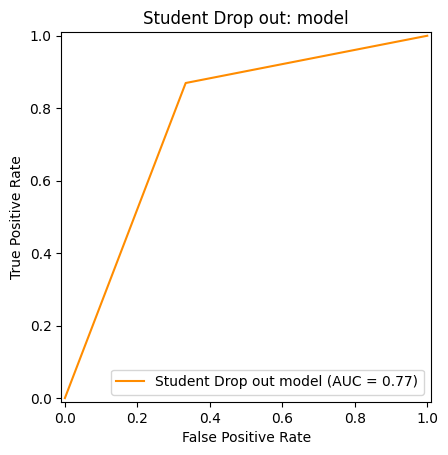

In [35]:
model_1, feature_importance_1 = hpo.cross_validation_hpo(
    x=x, y=y,
    search_space=search_space, 
    folds=5,
    algo='rf'
    )

In [36]:
feature_importance_1

,Feature,Importance
3,M04_1_N,0.772727
5,M06_1_N,0.136364
1,M02_1_N,0.045455
4,M05_1_N,0.045455
0,M01_1_N,0.000000
2,M03_1_N,0.000000


#### Shap analysis

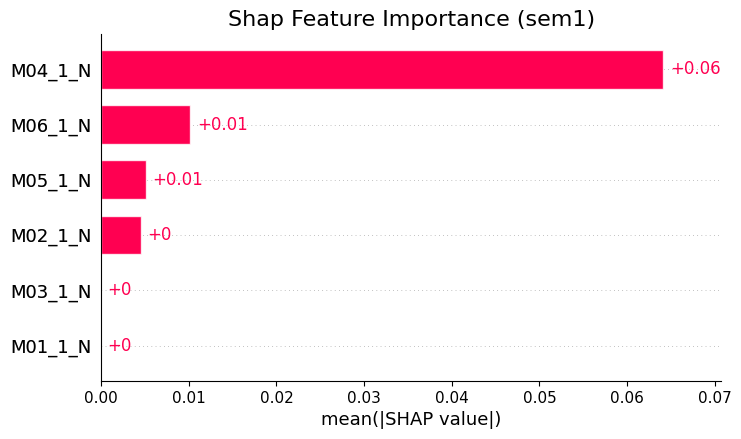

In [37]:
## Shap Global explainations
import shap
explainer = shap.TreeExplainer(model_1['model'], model_1['x_train'])
shap_values = explainer(model_1['x_test'])

plt.title('Shap Feature Importance (sem1)', fontsize=16)
shap.plots.bar(shap_values[...,1])

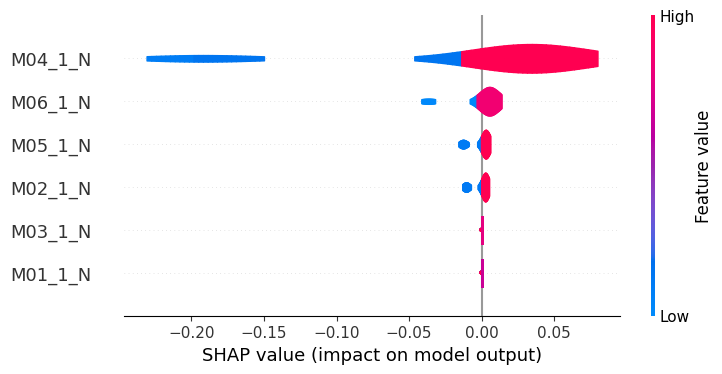

In [38]:
shap.plots.violin(shap_values[...,1], show=True)

In [39]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values[...,1], link='logit')

In [40]:
hpo.plot_shap_force(model=model_1, shap_values=shap_values, student_index=12, link='logit', model_name='rf') 

Student index 12 grades:
         grades
M01_1_N     5.1
M02_1_N     5.1
M03_1_N     5.1
M04_1_N     5.1
M05_1_N     5.1
M06_1_N     2.7
Status: 1, Prediction: [1], Probability [0]: 0.391, Probability [1]: 0.609


In [41]:
hpo.plot_shap_force(model=model_1, shap_values=shap_values, student_index=14, link='logit', model_name='rf') 

Student index 14 grades:
         grades
M01_1_N     5.1
M02_1_N     5.1
M03_1_N     5.1
M04_1_N     5.1
M05_1_N     5.1
M06_1_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.391, Probability [1]: 0.609


In [42]:
hpo.plot_shap_force(model=model_1, shap_values=shap_values, student_index=4, link='logit', model_name='rf') 

Student index 4 grades:
         grades
M01_1_N     2.0
M02_1_N     1.7
M03_1_N     1.0
M04_1_N     5.1
M05_1_N     5.1
M06_1_N     2.3
Status: 1, Prediction: [1], Probability [0]: 0.404, Probability [1]: 0.596


## BHT semester 2 

In [43]:
# Count occurrences of each unique value in the 'status' column
counter_2 = Counter(BHT_2['status'])
print(f'Quantity of Drop Out and Degree in THL-2: \n 1: {counter_2[1]} | 0: {counter_2[0]}')
hpo2 = ModelTrainer(random_state=72)
x2, y2 = hpo2.split_data(BHT_2, module2)

Quantity of Drop Out and Degree in THL-2: 
 1: 156 | 0: 27


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:01<00:00,  5.17trial/s, best loss: -0.7248333333333333]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            01               04
	 actual 1            05               27

Model parameters:
{'bootstrap': True, 'ccp_alpha': 0.210945122949575, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.009023595581392794, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 15, 'n_jobs': None, 'oob_score': True, 'random_state': 72, 'verbose': 0, 'warm_start': False}

Balanced acc.: 52.18750%
Validation accuracy.: 75.67568%
Sensitivity score (for 1): 84.37500%
Specificity score (for 0): 20.00000%
F1 score.: 85.71429%
False prediction: 24.32432%

-------------------------

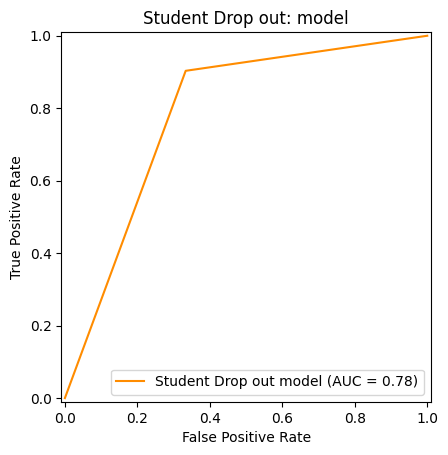

In [44]:
models_2, feature_importance_2 = hpo2.cross_validation_hpo(
    x=x2, y=y2,
    search_space=search_space, 
    folds=5,
    algo='rf'
    )

In [45]:
feature_importance_2

,Feature,Importance
3,M04_2_N,0.476190
10,M11_2_N,0.190476
4,M05_2_N,0.095238
6,M07_2_N,0.071429
9,M10_2_N,0.071429
0,M01_2_N,0.023810
5,M06_2_N,0.023810
7,M08_2_N,0.023810
8,M09_2_N,0.023810
1,M02_2_N,0.000000


#### Shap analysis

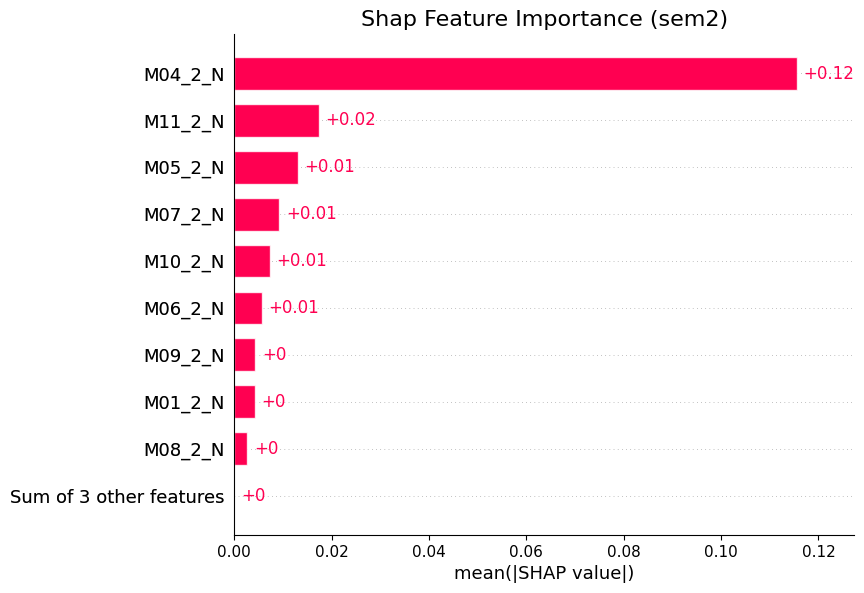

In [46]:
## Shap Global explainations
import shap
explainer2 = shap.TreeExplainer(models_2['model'], models_2['x_train'])
shap_values2 = explainer2(models_2['x_test'])

plt.title('Shap Feature Importance (sem2)', fontsize=16)
shap.plots.bar(shap_values2[...,1])

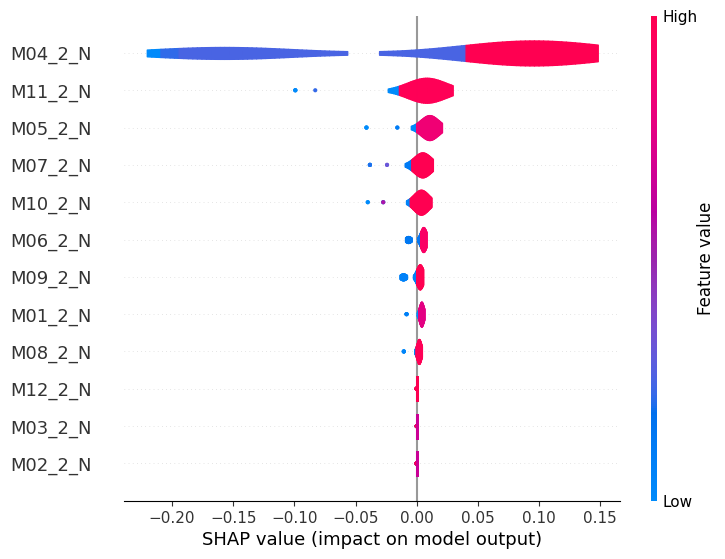

In [47]:
shap.plots.violin(shap_values2[...,1], show=True)

In [48]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values2[...,1], link='logit')

In [49]:
hpo2.plot_shap_force(model=models_2, shap_values=shap_values2, student_index=11, link='logit', model_name='rf')

Student index 11 grades:
         grades
M01_2_N     2.3
M02_2_N     2.0
M03_2_N     1.3
M04_2_N     3.0
M05_2_N     3.3
M06_2_N     1.3
M07_2_N     1.3
M08_2_N     3.3
M09_2_N     1.3
M10_2_N     2.7
M11_2_N     2.0
M12_2_N     5.1
Status: 0, Prediction: [0], Probability [0]: 0.689, Probability [1]: 0.311


In [50]:
hpo2.plot_shap_force(model=models_2, shap_values=shap_values2, student_index=12, link='logit', model_name='rf')

Student index 12 grades:
         grades
M01_2_N     5.1
M02_2_N     5.1
M03_2_N     5.1
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     5.1
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.232, Probability [1]: 0.768


In [51]:
hpo2.plot_shap_force(model=models_2, shap_values=shap_values2, student_index=16, link='logit', model_name='rf')

Student index 16 grades:
         grades
M01_2_N     3.3
M02_2_N     1.7
M03_2_N     5.1
M04_2_N     5.0
M05_2_N     5.1
M06_2_N     3.3
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.232, Probability [1]: 0.768


In [52]:
hpo2.plot_shap_force(model=models_2, shap_values=shap_values2, student_index=26, link='logit', model_name='rf')

Student index 26 grades:
         grades
M01_2_N     2.0
M02_2_N     2.0
M03_2_N     1.0
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     2.7
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     1.3
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.270, Probability [1]: 0.730


## BHT semester 3

In [24]:
# Count occurrences of each unique value in the 'status' column
counter_3 = Counter(BHT_3['status'])
print(f'Quantity of Drop Out and Degree in THL-1: \n 1: {counter_3[1]} | 0: {counter_3[0]}')
hpo3 = ModelTrainer(random_state=72)
x3, y3 = hpo3.split_data(BHT_3, module3)

Quantity of Drop Out and Degree in THL-1: 
 1: 114 | 0: 26


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:01<00:00,  5.93trial/s, best loss: -0.7867251461988303]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            04               01
	 actual 1            02               21

Model parameters:
{'bootstrap': True, 'ccp_alpha': 0.2834923961961247, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.020928072603611382, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 45, 'n_jobs': None, 'oob_score': True, 'random_state': 72, 'verbose': 0, 'warm_start': False}

Balanced acc.: 85.65217%
Validation accuracy.: 89.28571%
Sensitivity score (for 1): 91.30435%
Specificity score (for 0): 80.00000%
F1 score.: 93.33333%
False prediction: 10.71429%

------------------------

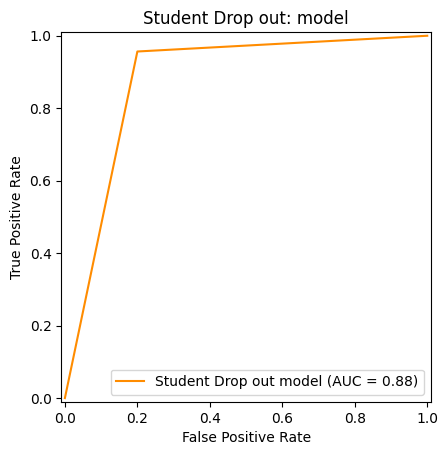

In [25]:
models_3, feature_importance_3 = hpo3.cross_validation_hpo(
    x=x3, y=y3,
    search_space=search_space, 
    folds=5,
    algo='rf'
    )

In [26]:
feature_importance_3

,Feature,Importance
8,M09_3_N,0.368184
10,M11_3_N,0.135929
13,M14_3_N,0.112639
9,M10_3_N,0.099612
14,M15_3_N,0.074030
12,M13_3_N,0.066367
7,M08_3_N,0.041308
3,M04_3_N,0.035740
1,M02_3_N,0.018981
2,M03_3_N,0.011814


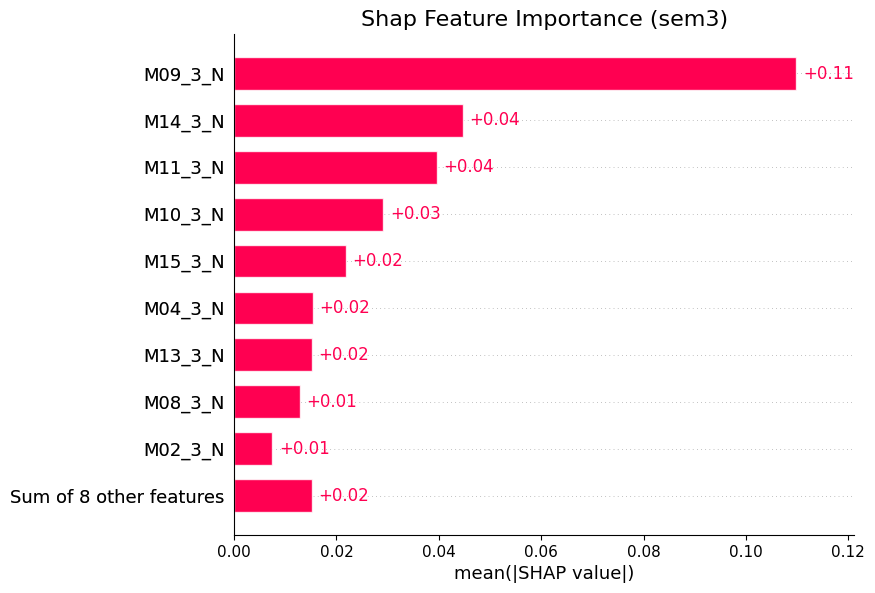

In [27]:
## Shap Global explainations
import shap
explainer3 = shap.TreeExplainer(models_3['model'], models_3['x_train'])
shap_values3 = explainer3(models_3['x_test'])

plt.title('Shap Feature Importance (sem3)', fontsize=16)
shap.plots.bar(shap_values3[..., 1])

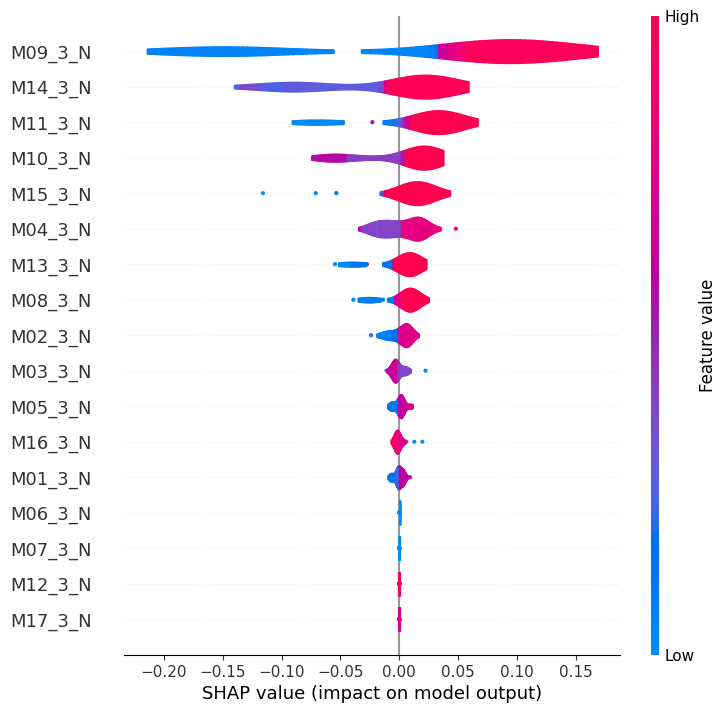

In [28]:
shap.plots.violin(shap_values3[..., 1], show=True)

In [29]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values3[..., 1], link='identity')

In [30]:
hpo3.plot_shap_force(model=models_3, shap_values=shap_values3, student_index=1, link='identity', model_name='rf')

Student index 1 grades:
         grades
M01_3_N     4.0
M02_3_N     2.7
M03_3_N     2.3
M04_3_N     4.0
M05_3_N     2.3
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     1.7
M09_3_N     1.3
M10_3_N     3.7
M11_3_N     3.0
M12_3_N     5.1
M13_3_N     3.0
M14_3_N     3.3
M15_3_N     2.3
M16_3_N     3.0
M17_3_N     3.0
Status: 0, Prediction: [0], Probability [0]: 0.753, Probability [1]: 0.247


In [31]:
hpo3.plot_shap_force(model=models_3, shap_values=shap_values3, student_index=4, link='identity', model_name='rf')

Student index 4 grades:
         grades
M01_3_N     1.0
M02_3_N     1.0
M03_3_N     1.3
M04_3_N     1.0
M05_3_N     5.1
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     5.1
M09_3_N     1.0
M10_3_N     1.0
M11_3_N     5.1
M12_3_N     5.1
M13_3_N     1.0
M14_3_N     1.0
M15_3_N     1.0
M16_3_N     1.3
M17_3_N     1.0
Status: 0, Prediction: [0], Probability [0]: 0.702, Probability [1]: 0.298


In [32]:
hpo3.plot_shap_force(model=models_3, shap_values=shap_values3, student_index=14, link='identity', model_name='rf')

Student index 14 grades:
         grades
M01_3_N     1.7
M02_3_N     5.1
M03_3_N     1.3
M04_3_N     5.1
M05_3_N     1.3
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     5.1
M09_3_N     5.1
M10_3_N     5.1
M11_3_N     5.1
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     5.1
M15_3_N     5.1
M16_3_N     5.1
M17_3_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.086, Probability [1]: 0.914


In [33]:
hpo3.plot_shap_force(model=models_3, shap_values=shap_values3, student_index=6, link='identity', model_name='rf')

Student index 6 grades:
         grades
M01_3_N     2.0
M02_3_N     2.3
M03_3_N     1.7
M04_3_N     3.0
M05_3_N     1.3
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     2.0
M09_3_N     1.3
M10_3_N     4.0
M11_3_N     5.1
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     5.1
M15_3_N     5.1
M16_3_N     5.1
M17_3_N     5.1
Status: 0, Prediction: [1], Probability [0]: 0.499, Probability [1]: 0.501
